<a href="https://colab.research.google.com/github/mannmoshe/machine-learning/blob/main/FinalProject/DetailedResidencePlans_Hebrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# פרויקט Machine Learning - תוכניות מגורים מפורטות<br>*מאת משה מן*

**סקירה כללית**<br>
מינהל התכנון מטפל בין השאר בתוכניות בנייה מפורטות.<BR>כל תכנית מפורטת מכילה נתונים רבים,<BR> הנתונים שנתמקד בהם בפרויקט זה הם נתוני תכניות מגורים.<BR><BR> כל בניין מתחלק לשטח ראשי ושטח שירות<BR>שטח ראשי הוא השטח שחולק בין הדיירים, כמו הדירות<BR>ושטח השירות הוא שטח המשותף לכל הדיירים, כמו חניה, חדר מדרגות ועוד.<BR><BR>
בעתיד הקרוב נתוני התוכניות לא יכללו את החלוקה בין אזור ראשי לשירות, כי זה לא חשוב לרשות כיחידה תכנונית, <BR>אבל עדיין, זה נתון חשוב לרגולציה, למשל בשביל חישוב הארנונה.<BR><BR> מטרת הפרויקט הוא לחזות את היחס בין שטח עיקרי לשטח שירות על סמך תכונות תא השטח והתוכנית, כך שניתן יהיה להשתמש במודל למטרות רגולטוריות.



ניתן לראות את הפרטים והמסמכים של התוכנית בכתובת:<br>
https://mavat.moin.gov.il/MavatPS/Forms/SV3.aspx?tid=3<br>
על ידי הזנת ה-PL_NUMBER.<BR>
נתוני שטח עיקרי ושירות נמצאים בקובץ הוראות תוכנית.

ייבוא הנתונים:

In [219]:
import pandas as pd
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [220]:
cellsdata = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData.csv')

הנתונים הם של תוכניות מפורטות עם אזור מגורים שאושרו בין ינואר 2017 לנובמבר 2021.
### רשימת השדות

<table>
  <tbody>
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>PL_NUMBER : מספר התוכנית</li>
          <br>
          <li>PL_AREA: מספר התוכנית משורשר למספר של תא שטח (לתכנית יכולים להיות כמה תאי שטח)</li>
          <br>
          <li>LANDUSE: שימוש בקרקע</li>
          <br>
          <li>MAIN_AREA: שטח מחולק בין הדיירים מעל הכניסה הקובעת (מטר מרובע)<br>זהו המשתנה התלוי שצריך לחזות!</li>
          <br>
          <li>SERVICE_AREA: אזור משותף של כל הדיירים מעל הכניסה הקובעת (מטר מרובע)</li>
          <br>
          <li>CELL_SIZE_TOTAL: הגודל של תא שטח</li>
          <br>
          <li>CELL_SIZE_MIN: הגודל המינימלי של תא שטח</li>
          <br>
          <li>CELL_SIZE_MAX: הגודל המרבי של תא שטח</li>
          <br>
          <li>HOUSING_UNITS: מספר יחידות דיור</li>
          <br>
          <li>BUILDING_HEIGHT: גובה הבניין (מטר)</li>
          <br>
          <li>FLOORS_NUM: מספר הקומות</li>
          <br>
          <li>TOTAL_AREA: סכום השטח הראשי ואזור השירות</li>
          <br>
          <li>AUTHORITY: סמכות התוכנית</li>
          <br>
          <li>DISTRICT: מחוז התוכנית</li>
          <br>
          <li>SECTOR_GROUP: מגזר התוכנית</li>
          <br>
          <li>CONFIRMATION_YEAR: שנת אישור התוכנית</li>
          <br>
          <li>CONSTRUCTION_TYPE_GROUP: סוג הבנייה</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>

In [221]:
cellsdata.shape

(13709, 17)

הנתונים מורכבים מ-13,709 שורות (כאשר כל שורה מייצגת תא שטח) ו-17 עמודות.

נראה את סוג הנתונים (data type):

In [222]:
cellsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13709 entries, 0 to 13708
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PL_NUMBER                13709 non-null  object 
 1   PL_AREA                  13709 non-null  object 
 2   LANDUSE                  13709 non-null  object 
 3   MAIN_AREA                13709 non-null  float64
 4   SERVICE_AREA             13709 non-null  float64
 5   CELL_SIZE_TOTAL          13709 non-null  float64
 6   CELL_SIZE_MIN            13709 non-null  float64
 7   CELL_SIZE_MAX            13709 non-null  float64
 8   HOUSING_UNITS            13709 non-null  float64
 9   BUILDING_HEIGHT          13709 non-null  float64
 10  FLOORS_NUM               13709 non-null  float64
 11  TOTAL_AREA               13709 non-null  float64
 12  AUTHORITY                13709 non-null  object 
 13  DISTRICT                 13709 non-null  object 
 14  SECTOR_GROUP          

## Data Preprocessing

כעת נייצר עמודה נוספת בכדי לבדוק מהו אחוז השטח העיקרי

In [223]:
cellsdata['MAIN_AREA_PER'] = cellsdata['MAIN_AREA'] / cellsdata['TOTAL_AREA']

כמעט כל תכנית מורכבת משטחים מרובים, ובדרך כלל תכונות השטח של אותה תכנית דומות מאוד, עובדה זו עשויה לתת השפעה עודפת לתכנית ספציפית; <br>למשל תכנית שיש לה 100 תאי שטח שבכולם אחוז שטח העיקרי הוא 80% תשפיע על הממוצע יותר מתכנית עם תא שטח בודד שבה השטח העיקרי הוא 60% <br>לכן אקח רק את השטח הראשון של כל תכנית.

In [224]:
data = cellsdata.drop_duplicates(subset="PL_NUMBER", keep="first")
data.shape

(2582, 18)

נותרנו עם 2,582 תכניות, כאשר לכל תכנית יש תא שטח יחיד שמייצג אותה.
הנה חלק מהנתונים לדוגמא:

In [225]:
data.head(3)

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,MAIN_AREA_PER
0,610-0197038,610-0197038-102,מגורים,975.0,300.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,מחוזית,דרום,חברה כללית / מעורבת,2017,חדשה,0.764706
2,151-0392894,151-0392894-210,מגורים,960.0,180.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,מחוזית,ירושלים,חברה כללית / מעורבת,2017,התחדשות,0.842105
73,תמל/ 1049,תמל/ 1049-123,מגורים,152.0,48.0,420.0,0.0,0.0,1.0,0.0,2.0,200.0,ארצית,מרכז,חברה כללית / מעורבת,2019,חדשה,0.760000


נחשב את אחוז השטח העיקרי הממוצע:

In [226]:
data['MAIN_AREA_PER'].mean()

0.8183585634216552

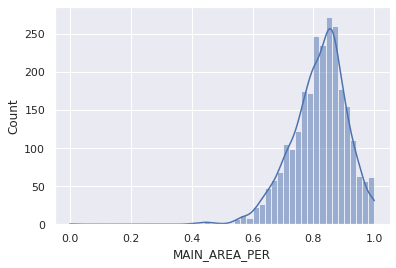

In [227]:
sns.histplot(data=data, x="MAIN_AREA_PER", bins=50, kde=True)

## Feature engineering

### שדות קטגוריים

ראשית נוסיף עמודה שתבדוק האם תכנית היא תמ"ל או לא.

In [228]:
data['PL_NUMBER'].str.contains('תמל').sum()

60

In [229]:
data['IS_TAMAL'] = data['PL_NUMBER'].apply(lambda x: 1 if 'תמל' in x else 0)
data['IS_TAMAL'].value_counts()

0    2522
1      60
Name: IS_TAMAL, dtype: int64

ישנן 60 תכניות תמ"ל בלבד וכעת יש לנו סיווג שלהן.

כעת נבחן אילו שימושי קרקע קיימים:

In [230]:
data['LANDUSE'].value_counts()

מגורים                                2444
מגורים ומסחר                            66
מגורים מסחר ותעסוקה                     36
מגורים ומבנים ומוסדות ציבור              6
מגורים מסחר ותיירות                      6
מגורים מסחר ומבנים ומוסדות ציבור         5
מגורים תעסוקה ותיירות                    5
מגורים ודיור מיוחד                       3
מגורים ותיירות                           2
מגורים מסחר ותחבורה                      2
מגורים ומשרדים                           2
תתתת מגורים ב                            2
מגורים ותחבורה                           1
מגורים תיירות ומבנים ומוסדות ציבור       1
מגורים ואירוח כפרי                       1
Name: LANDUSE, dtype: int64

הרוב המוחלט - מגורים, את כל השאר נאחד לקטגוריה אחת שתיקרא: מגורים משולב

In [231]:
data['LANDUSE'] = data['LANDUSE'].mask(data['LANDUSE'] != 'מגורים', 'מגורים משולב')

In [232]:
data['LANDUSE'].value_counts()

מגורים          2444
מגורים משולב     138
Name: LANDUSE, dtype: int64

נטפל בערכים חסרים:

In [233]:
data['SECTOR_GROUP'].value_counts()

חברה ערבית             1273
חברה כללית / מעורבת    1043
חברה חרדית              207
(חסר)                    59
Name: SECTOR_GROUP, dtype: int64

ניתן להניח שאפשר לשייך את הסקטור החסר לחברה כללית כי זוהי קטגוריה כללית 

In [234]:
data['SECTOR_GROUP'] = data['SECTOR_GROUP'].mask(data['SECTOR_GROUP'] == '(חסר)', 'חברה כללית / מעורבת')
data['SECTOR_GROUP'].value_counts()

חברה ערבית             1273
חברה כללית / מעורבת    1102
חברה חרדית              207
Name: SECTOR_GROUP, dtype: int64

[טיפול בערכים ריקים](https://stackoverflow.com/questions/57135918/remove-non-zero-fields-from-df-isnull-sum/57135996):

In [235]:
nullseries = data.isnull().sum()
nullseries[nullseries > 0]

CONSTRUCTION_TYPE_GROUP    4
dtype: int64

In [236]:
data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       1526
התחדשות     922
הסדרה       130
NaN           4
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

[נמלא את השדות הריקים עם סוג הבניה הנפוץ ביותר](https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas) ההסתברות של סוג בניה "חדשה" היא הגבוהה ביותר

In [237]:
data['CONSTRUCTION_TYPE_GROUP'] = data['CONSTRUCTION_TYPE_GROUP'].fillna(data['CONSTRUCTION_TYPE_GROUP'].mode().iloc[0])
data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       1530
התחדשות     922
הסדרה       130
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

כעת נבחן את אחוז השטח העיקרי לפי השדות הקטגוריים השונים

In [238]:
categorical_cols = data.select_dtypes(['object']).columns
categorical_cols

Index(['PL_NUMBER', 'PL_AREA', 'LANDUSE', 'AUTHORITY', 'DISTRICT',
       'SECTOR_GROUP', 'CONSTRUCTION_TYPE_GROUP'],
      dtype='object')

IS_TAMAL
0    0.820495
1    0.728565
Name: MAIN_AREA_PER, dtype: float64
AUTHORITY
ארצית     0.728565
מחוזית    0.820495
Name: MAIN_AREA_PER, dtype: float64


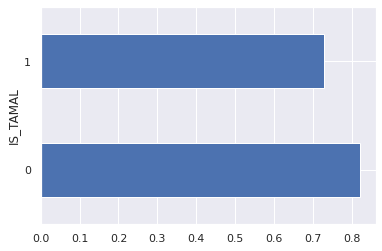

In [239]:
print(data.groupby('IS_TAMAL')['MAIN_AREA_PER'].mean())
print(data.groupby('AUTHORITY')['MAIN_AREA_PER'].mean())

(data.groupby('IS_TAMAL')['MAIN_AREA_PER'].mean()).plot(kind='barh')

בתכניות תמל הממוצע הוא של 73% שטח עיקרי לעומת שאר התכניות ששם זה 82% שטח עיקרי

In [240]:
data.groupby('LANDUSE')['MAIN_AREA_PER'].mean().sort_values()

LANDUSE
מגורים משולב    0.803289
מגורים          0.819209
Name: MAIN_AREA_PER, dtype: float64

אין הבדל משמעותי בין מגורים למגורים משולב

DISTRICT
תל-אביב    0.734659
חיפה       0.753132
מרכז       0.778301
צפון       0.823117
ירושלים    0.840985
דרום       0.845286
Name: MAIN_AREA_PER, dtype: float64


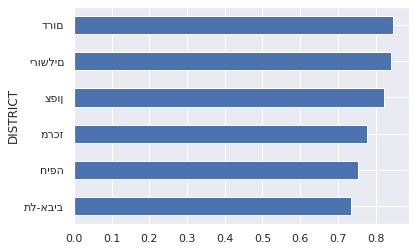

In [241]:
print(data.groupby('DISTRICT')['MAIN_AREA_PER'].mean().sort_values())
(data.groupby('DISTRICT')['MAIN_AREA_PER'].mean().sort_values()).plot(kind='barh')

ניתן לראות שיש הבדלים באחוז השטח העיקרי בין המחוזות השונים

In [242]:
data.groupby('SECTOR_GROUP')['MAIN_AREA_PER'].mean().sort_values()

SECTOR_GROUP
חברה כללית / מעורבת    0.790148
חברה חרדית             0.817537
חברה ערבית             0.842913
Name: MAIN_AREA_PER, dtype: float64

ניתן לראות שבחברה הערבית אחוז השטח העיקרי הגבוה ביותר

In [243]:
data.groupby('CONSTRUCTION_TYPE_GROUP')['MAIN_AREA_PER'].mean().sort_values()

CONSTRUCTION_TYPE_GROUP
חדשה       0.816283
התחדשות    0.819859
הסדרה      0.832148
Name: MAIN_AREA_PER, dtype: float64

ניתן לראות שבסוג בניה "הסדרה" אחוז השטח העיקרי הגבוה ביותר

### שדות נומריים

העמודות CELL_SIZE_TOTAL, CELL_SIZE_MIN ו-CELL_SIZE_MAX מתארות את גודל התא.

In [244]:
data[['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX']].describe()

,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX
count,2582.000000,2582.000000,2582.000000
mean,1090.196193,168.493582,8.830287
std,2387.854179,954.531702,149.623238
min,0.000000,0.000000,0.000000
25%,386.250000,0.000000,0.000000
50%,659.500000,0.000000,0.000000
75%,1020.750000,0.000000,0.000000
max,63924.000000,32000.000000,5690.000000


נבדוק את כמות יחידות הדיור:

In [245]:
data['HOUSING_UNITS'].value_counts().sort_index().head()

0.0     79
1.0    353
2.0    225
3.0    162
4.0    393
Name: HOUSING_UNITS, dtype: int64

יחידות דיור לא צריכות להיות אפס.<BR> במקום 0 נתן את מספר הקומות כפול 2

In [246]:
data['HOUSING_UNITS'] = data['HOUSING_UNITS'].mask(data['HOUSING_UNITS'] == 0, data['FLOORS_NUM']*2)

In [247]:
data['HOUSING_UNITS'].value_counts().sort_index().head()

0.0      2
1.0    353
2.0    227
3.0    162
4.0    406
Name: HOUSING_UNITS, dtype: int64

עדיין נותרו 2 מקרים של אפסים (אין נתון של מספר קומות) - נוריד את המקרים החריגים.

In [248]:
data = data[data['HOUSING_UNITS'] > 0]
data.shape 

(2580, 19)

כעת נבחן את נתוני גובה הבניין

In [249]:
data['BUILDING_HEIGHT'].value_counts()[:11].head()

0.0     249
12.0    246
8.5     178
15.0    162
9.0     125
Name: BUILDING_HEIGHT, dtype: int64

הרבה נתונים חסרים, BUILDING_HEIGHT לא אמור להיות אפס.<br>
אחליף אותו בממוצע של BUILDING_HEIGHT.

In [250]:
building_height_avg = round(data[data['BUILDING_HEIGHT'] > 0]['BUILDING_HEIGHT'].mean())
building_height_avg

16

In [181]:
data['BUILDING_HEIGHT'] = data['BUILDING_HEIGHT'].mask(data['BUILDING_HEIGHT']==0, building_height_avg)
data['BUILDING_HEIGHT'].value_counts().head()

16.0    293
12.0    246
8.5     178
15.0    162
9.0     125
Name: BUILDING_HEIGHT, dtype: int64

נסיר את העמודות שאינן שימושיות עבור החיזוי

In [251]:
data = data.drop(['PL_NUMBER', 'PL_AREA', 'MAIN_AREA_PER', 'SERVICE_AREA'], axis=1)

In [252]:
dummies_data = pd.get_dummies(data)
print(dummies_data.shape)
dummies_data.head()

(2580, 26)


,MAIN_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,CONFIRMATION_YEAR,IS_TAMAL,...,DISTRICT_ירושלים,DISTRICT_מרכז,DISTRICT_צפון,DISTRICT_תל-אביב,SECTOR_GROUP_חברה חרדית,SECTOR_GROUP_חברה כללית / מעורבת,SECTOR_GROUP_חברה ערבית,CONSTRUCTION_TYPE_GROUP_הסדרה,CONSTRUCTION_TYPE_GROUP_התחדשות,CONSTRUCTION_TYPE_GROUP_חדשה
0,975.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,2017,0,...,0,0,0,0,0,1,0,0,0,1
2,960.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,2017,0,...,1,0,0,0,0,1,0,0,1,0
73,152.0,420.0,0.0,0.0,1.0,0.0,2.0,200.0,2019,1,...,0,1,0,0,0,1,0,0,0,1
297,2090.0,1496.0,0.0,0.0,19.0,25.5,6.0,3135.0,2017,0,...,0,0,0,1,0,1,0,0,0,1
322,675.0,563.0,0.0,0.0,4.0,21.0,4.0,900.0,2018,1,...,0,0,1,0,0,0,1,0,0,1


Get dummies של העמודות הקטגוריות כדי שנוכל לבנות מודל.

In [253]:

dummies_data.columns = ['MAIN_AREA', 'CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX', 'HOUSING_UNITS', 'BUILDING_HEIGHT', 'FLOORS_NUM', 'TOTAL_AREA',
                        'CONFIRMATION_YEAR', 'IS_TAMAL', 'LANDUSE_RESIDENCE', 'LANDUSE_RESIDENCE_MIXED', 'AUTHORITY_COUNTRY', 'AUTHORITY_DISTRICT',
                        'DISTRICT_SOUTH', 'DISTRICT_HAIFA', 'DISTRICT_JERUSALEM', 'DISTRICT_DAN', 'DISTRICT_NORTH', 'DISTRICT_TEL_AVIV', 'SECTOR_REL',
                        'SECTOR_MIXED', 'SECTOR_ARAB', 'CONSTRUCTION_TYPE_ARRANGING', 'CONSTRUCTION_TYPE_REGENERATION', 'CONSTRUCTION_TYPE_NEW']
dummies_data.head()

,MAIN_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,CONFIRMATION_YEAR,IS_TAMAL,...,DISTRICT_JERUSALEM,DISTRICT_DAN,DISTRICT_NORTH,DISTRICT_TEL_AVIV,SECTOR_REL,SECTOR_MIXED,SECTOR_ARAB,CONSTRUCTION_TYPE_ARRANGING,CONSTRUCTION_TYPE_REGENERATION,CONSTRUCTION_TYPE_NEW
0,975.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,2017,0,...,0,0,0,0,0,1,0,0,0,1
2,960.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,2017,0,...,1,0,0,0,0,1,0,0,1,0
73,152.0,420.0,0.0,0.0,1.0,0.0,2.0,200.0,2019,1,...,0,1,0,0,0,1,0,0,0,1
297,2090.0,1496.0,0.0,0.0,19.0,25.5,6.0,3135.0,2017,0,...,0,0,0,1,0,1,0,0,0,1
322,675.0,563.0,0.0,0.0,4.0,21.0,4.0,900.0,2018,1,...,0,0,1,0,0,0,1,0,0,1


לבסוף, הנתונים מוכנים ללימוד מכונה.<BR>
# Data Exploration
מציאת קורלציות בין המאפיינים השונים לבין אחוז שטח עיקרי:

In [255]:
corr = dummies_data.corr()
corr.loc['MAIN_AREA'].sort_values(ascending=False)

MAIN_AREA                         1.000000
TOTAL_AREA                        0.996335
HOUSING_UNITS                     0.834821
FLOORS_NUM                        0.658868
CELL_SIZE_TOTAL                   0.609265
BUILDING_HEIGHT                   0.495043
DISTRICT_TEL_AVIV                 0.279853
AUTHORITY_COUNTRY                 0.185409
IS_TAMAL                          0.185409
SECTOR_MIXED                      0.184196
CONSTRUCTION_TYPE_REGENERATION    0.096998
LANDUSE_RESIDENCE_MIXED           0.083635
DISTRICT_DAN                      0.054586
CELL_SIZE_MIN                     0.041367
DISTRICT_HAIFA                    0.036823
CELL_SIZE_MAX                     0.014051
DISTRICT_SOUTH                   -0.003237
SECTOR_REL                       -0.025171
CONFIRMATION_YEAR                -0.032031
CONSTRUCTION_TYPE_ARRANGING      -0.045942
DISTRICT_JERUSALEM               -0.052744
CONSTRUCTION_TYPE_NEW            -0.074129
LANDUSE_RESIDENCE                -0.083635
DISTRICT_NO

ניתן לראות שבסקטור הערבי יש קורלציה מסויימת (אחוז השטח העיקרי שם גבוה יותר)<br> וכן שיש קשר שלילי בין מספר הקומות, גובה הבניין והשטח הכולל - ככל שיש יותר קומות, והשטח הכולל גדול יותר - אחוז השטח העיקרי נמוך יותר.

In [257]:
abs_corr = abs(dummies_data.corr())
abs_corr.loc['MAIN_AREA'].sort_values(ascending=False).head(10)

MAIN_AREA             1.000000
TOTAL_AREA            0.996335
HOUSING_UNITS         0.834821
FLOORS_NUM            0.658868
CELL_SIZE_TOTAL       0.609265
BUILDING_HEIGHT       0.495043
DISTRICT_TEL_AVIV     0.279853
IS_TAMAL              0.185409
AUTHORITY_COUNTRY     0.185409
AUTHORITY_DISTRICT    0.185409
Name: MAIN_AREA, dtype: float64

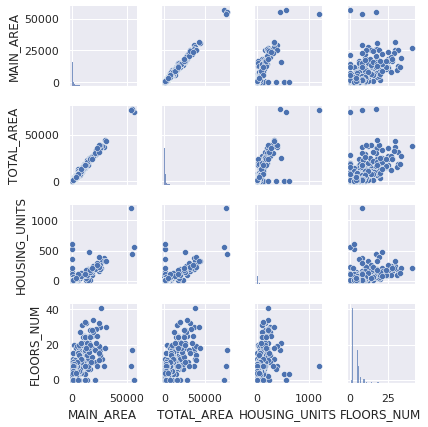

In [258]:
%matplotlib inline
sns.pairplot(dummies_data[['MAIN_AREA', 'TOTAL_AREA', 'HOUSING_UNITS', 'FLOORS_NUM']], height=1.5);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


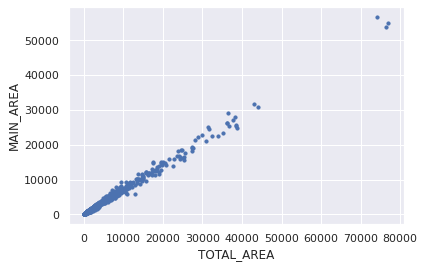

In [259]:
dummies_data.plot.scatter(x = 'TOTAL_AREA', y = 'MAIN_AREA', s = 10)

הסרת חריגים:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


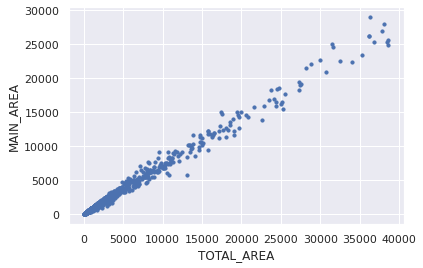

In [261]:
dummies_data = dummies_data[dummies_data['TOTAL_AREA'] < 40000]
dummies_data.plot.scatter(x = 'TOTAL_AREA', y = 'MAIN_AREA', s = 10)

ל-TOTAL_AREA יש מערכת יחסים חזקה מאוד עם MAIN_AREA!

אנסה את מודל KNeighborsRegressor לניבוי ה-MAIN_AREA.
TOTAL_AREA יהיה המאפיין היחיד.

# K Nearest Neighbors model

In [264]:
feature_cols = ['TOTAL_AREA']

In [265]:
X = dummies_data[feature_cols]
y = dummies_data['MAIN_AREA']

There is no need to scale X, because I want the model will refer to the actual TOTAL_AREA value. 

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Hyperparameter Tuning: Finding best parameters

In [267]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# find best n_neighbors and weights
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25], 'weights':['uniform', 'distance']}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [269]:
neigh = KNeighborsRegressor(n_neighbors=15, weights='distance')
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [270]:
y_pred = neigh.predict(X_test)

In [271]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
knn_mae = mean_absolute_error(y_test, y_pred)
print("MAE:", knn_mae)

knn_mse = mean_squared_error(y_test, y_pred)
print("MSE:", knn_mse)

knn_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", knn_rmse)

knn_rsquared = r2_score(y_test, y_pred)
print("R Squared:", knn_rsquared)

MAE: 149.55219208940758
MSE: 122649.60587307863
RMSE: 350.2136574622392
R Squared: 0.9869479362725436


[Merging results from model predict with original pandas dataframe.](https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe)


In [273]:
test_predictions_df = pd.DataFrame(y_test)
test_predictions_df['y_pred'] = y_pred
test_predictions_df.columns = ['MAIN_AREA_true', 'KNN_predictions']
test_predictions_df['Total_area'] = dummies_data['TOTAL_AREA']
test_predictions_df.T

,12677,12077,9296,12692,11043,11294,4786,12721,13301,13706,...,12757,12364,13461,12237,1905,11832,11257,13201,12691,13536
MAIN_AREA_true,1580.000000,275.000000,200.000000,952.0,355.0,75.000000,809.050000,720.0,203.010000,1211.750000,...,990.000000,890.000000,570.000000,399.000000,457.0,19100.000000,475.00000,868.220000,890.500000,270.0
KNN_predictions,1638.283819,265.571429,199.369458,1010.0,285.0,89.357078,884.105023,751.8,175.316243,1274.213701,...,983.119223,1146.591923,569.727273,385.037437,468.5,18830.085928,463.88894,755.947408,828.984346,325.0
Total_area,2003.000000,320.000000,258.000000,1155.0,355.0,90.000000,985.570000,880.0,217.980000,1473.750000,...,1232.000000,1340.000000,600.000000,449.500000,580.0,27400.000000,615.00000,904.970000,1027.500000,350.0


**Testing the model again on new data - only areas of plans that confirmed after Nov 2021.**

In [274]:
new_cellsdata = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData_New.csv')

Here I do not care to take multiple areas of same plans - because I want to test the model.

In [275]:
new_data = new_cellsdata[new_cellsdata['TOTAL_AREA'] < 40000]
new_data.shape

(359, 17)

In [276]:
X_new = new_data[feature_cols]
y_new = new_data['MAIN_AREA']

In [277]:
y_new_pred = neigh.predict(X_new)

In [278]:
knn_new_mae = mean_absolute_error(y_new, y_new_pred)
print("MAE:", knn_new_mae)

knn_new_mse = mean_squared_error(y_new, y_new_pred)
print("MSE:", knn_new_mse)

knn_new_rmse = mean_squared_error(y_new, y_new_pred, squared=False)
print("RMSE:", knn_new_rmse)

knn_new_rsquared = r2_score(y_new, y_new_pred)
print("R Squared:", knn_new_rsquared)

MAE: 218.72816344680456
MSE: 134402.6351713456
RMSE: 366.60964958842203
R Squared: 0.9737304053500706


In [279]:
new_predictions_df = pd.DataFrame(y_new)
new_predictions_df['y_pred'] = y_new_pred
new_predictions_df.columns = ['MAIN_AREA_true', 'KNN_predictions']
new_predictions_df['Total_area'] = new_data['TOTAL_AREA']

new_predictions_df.T

,0,1,2,3,4,5,6,7,8,9,...,349,350,351,352,353,354,355,356,357,358
MAIN_AREA_true,576.0,220.0,240.0,570.400000,768.800000,620.0,590.240000,728.000000,3250.000000,15155.000000,...,230.0,370.000000,383.140000,240.0,480.000000,527.050000,810.600000,811.0,920.0,3034.000000
KNN_predictions,576.8,230.0,246.8,551.822287,730.580274,595.0,558.887134,686.357143,3358.802078,15772.550068,...,220.0,387.712764,385.862118,246.8,538.666667,639.757538,810.509426,781.5,971.5,2706.828496
Total_area,672.0,280.0,300.0,662.400000,892.800000,720.0,685.440000,800.000000,4250.000000,22220.000000,...,284.0,452.000000,457.140000,300.0,640.000000,746.940000,955.350000,943.0,1130.0,3634.000000


# Linear Regression model

The next step is to try linear regression model and see how it affect the results.<BR>The feture cloumns will be all the features with at least 0.5 Pearson correlation coefficient. 

In [ ]:
corr.loc['MAIN_AREA'].sort_values(ascending=False).head(10)

MAIN_AREA             1.000000
TOTAL_AREA            0.996335
HOUSING_UNITS         0.834821
FLOORS_NUM            0.658868
CELL_SIZE_TOTAL       0.609265
BUILDING_HEIGHT       0.587021
DISTRICT_TEL_AVIV     0.279853
IS_TAMAL              0.185409
AUTHORITY_COUNTRY     0.185409
AUTHORITY_DISTRICT    0.185409
Name: MAIN_AREA, dtype: float64

In [ ]:
feature_cols_linear_reg = ['TOTAL_AREA', 'HOUSING_UNITS', 'FLOORS_NUM', 'CELL_SIZE_TOTAL', 'BUILDING_HEIGHT'] 

In [ ]:
X = dummies_data[feature_cols_linear_reg]
y = dummies_data['MAIN_AREA']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge()
rr.fit(X_train, y_train)

lassor = Lasso()
lassor.fit(X_train, y_train)

Lasso()

In [ ]:
lr_y_pred = lr.predict(X_test)
rr_y_pred = rr.predict(X_test)
lassor_y_pred = lassor.predict(X_test)

In [ ]:
lr_mae = mean_absolute_error(y_test, lr_y_pred)
rr_mae = mean_absolute_error(y_test, rr_y_pred)
lassor_mae = mean_absolute_error(y_test, lassor_y_pred)

lr_mse = mean_squared_error(y_test, lr_y_pred)
rr_mse = mean_squared_error(y_test, rr_y_pred)
lassor_mse = mean_squared_error(y_test, lassor_y_pred)

lr_rmse = mean_squared_error(y_test, lr_y_pred, squared=False)
rr_rmse = mean_squared_error(y_test, rr_y_pred, squared=False)
lassor_rmse = mean_squared_error(y_test, lassor_y_pred, squared=False)

lr_rsquared = r2_score(y_test, lr_y_pred)
rr_rsquared = r2_score(y_test, rr_y_pred)
lassor_rsquared = r2_score(y_test, lassor_y_pred)

reg_labels = ['Linear Regression', 'Ridge', 'Lasso']

reg_mae_vals = [lr_mae, rr_mae, lassor_mae]
reg_mse_vals = [lr_mse, rr_mse, lassor_mse]
reg_rmse_vals = [lr_rmse, rr_rmse, lassor_rmse]
reg_rsquared_vals = [lr_rsquared, rr_rsquared, lassor_rsquared]

reg_compare_df = pd.DataFrame({
    'MAE': reg_mae_vals,
    'MSE': reg_mse_vals,
    'RMSE': reg_rmse_vals,
    'Rsquared': reg_rsquared_vals
}, index=reg_labels)

reg_compare_df

,MAE,MSE,RMSE,Rsquared
Linear Regression,161.878259,117972.609724,343.471410,0.987446
Ridge,161.877535,117972.391486,343.471093,0.987446
Lasso,161.815705,117959.751029,343.452691,0.987447


The Lasso results are slightly better than ridge and linear regression,<br>therefore I will stay with the Lasso model.

In [ ]:
# find best parameters for lasso
params = {'alpha':[.1, .3, .5, .7, .9, 1], 'max_iter':[200, 400, 600, 800, 1000], 'selection':['cyclic', 'random']}

lassor = Lasso()

model = GridSearchCV(lassor, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'alpha': 0.1, 'max_iter': 200, 'selection': 'cyclic'}

In [ ]:
lassor = Lasso(alpha=0.1, max_iter=1000, selection='random')
lassor.fit(X_train, y_train)

lassor_mae = mean_absolute_error(y_test, lassor_y_pred)
lassor_mse = mean_squared_error(y_test, lassor_y_pred)
lassor_rmse = mean_squared_error(y_test, lassor_y_pred, squared=False)
lassor_rsquared = r2_score(y_test, lassor_y_pred)

print("MAE:", lassor_mae)
print("MSE:", lassor_mse)
print("RMSE:", lassor_rmse)
print("R Squared:", lassor_rsquared)

MAE: 161.81570510436867
MSE: 117959.75102886723
RMSE: 343.4526911073303
R Squared: 0.9874470188734491


In [ ]:
print(lassor.coef_, lassor.intercept_)

[  0.71367267  -0.16425064 -18.23752788   0.02238      0.47266634] 155.7776625884078


The linear equation is:<BR>
\begin{align}
  MAIN AREA = 0.71 * totalarea - 0.16 * housingunits -18.23 * floorsnum + 0.022 * cellsizetotal + 0.47 * buildingheight + 155.77 
  \end{align}

In [ ]:
test_predictions_df['LASSO_predictions'] = lassor_y_pred
test_predictions_df.T

,12677,12077,9296,12692,11043,11294,4786,12721,13301,13706,13520,11454,13277,11477,12713,11744,12436,9948,12602,12761,11879,11035,11689,12026,11543,13284,1571,1417,12638,13610,13529,13421,9043,11005,13542,11614,13003,13530,1336,13493,...,11663,12196,13598,12073,6517,12045,12778,11412,11698,13554,11958,5172,11776,13345,11804,7057,4577,5879,12161,12000,441,12999,5415,5385,7488,1830,12604,1947,13397,13260,12757,12364,13461,12237,1905,11832,11257,13201,12691,13536
MAIN_AREA_true,1580.000000,275.000000,200.000000,952.000000,355.000000,75.000000,809.050000,720.000000,203.010000,1211.750000,200.000000,130.000000,596.500000,250.000000,396.000000,850.000000,3000.000000,640.000000,480.000000,220.000000,4352.000000,2460.000000,916.000000,262.000000,5130.000000,701.400000,123.600000,859.000000,350.000000,1107.000000,776.000000,472.500000,761.000000,467.280000,450.000000,360.000000,790.000000,1190.000000,860.000000,1061.000000,...,2336.000000,700.000000,750.000000,893.000000,90.000000,180.000000,1548.030000,1344.000000,875.000000,192.000000,1903.000000,160.000000,568.000000,730.300000,1525.000000,670.00000,1281.000000,870.000000,557.000000,490.000000,3476.000000,383.000000,720.00000,11875.000000,840.000000,240.000000,283.000000,360.000000,533.000000,7125.000000,990.000000,890.000000,570.000000,399.000000,457.000000,19100.000000,475.000000,868.220000,890.500000,270.000000
KNN_predictions,1638.283819,265.571429,199.369458,1010.000000,285.000000,89.357078,884.105023,751.800000,175.316243,1274.213701,205.250000,156.000000,543.543257,246.800000,375.333333,887.733333,2915.000000,692.888889,499.666667,212.000000,4883.968123,3294.030025,905.145878,283.000000,4859.952531,698.500000,136.933501,849.000000,345.000000,1301.849829,696.351513,402.902643,760.127899,496.100000,562.918352,385.000000,771.772311,1414.844986,887.733333,1031.684546,...,2035.183312,556.000000,800.000000,914.258038,134.375517,180.000000,1653.837073,1516.477383,777.500000,221.000000,2371.374929,159.121672,538.666667,903.523062,1730.711936,757.00000,1274.275641,938.940979,597.074009,512.000000,4553.319911,357.516111,970.00000,11932.468314,810.666667,246.800000,246.800000,334.375000,466.772306,5114.103058,983.119223,1146.591923,569.727273,385.037437,468.500000,18830.085928,463.888940,755.947408,828.984346,325.000000
LASSO_predictions,1539.022697,401.470369,318.344638,953.385826,379.233269,195.680686,841.586674,698.166406,288.257423,1138.829269,301.624213,263.092509,570.474845,354.774828,427.078738,842.132515,3049.296168,724.061252,506.477746,343.680027,4885.886271,2823.968120,846.470451,354.225456,4536.791994,678.090356,216.788079,797.157982,485.935751,1365.972481,736.069400,451.227348,798.408110,474.324927,709.174485,436.835967,749.265149,1492.411545,842.054409,974.201819,...,1932.139869,685.201219,823.575249,829.754993,227.380789,289.757837,1575.328437,1405.014094,792.083049,308.613897,2050.601747,257.330312,554.561113,830.896367,1451.308138,706.45565,1189.494849,851.114208,592.329350,531.987301,4194.929947,396.365525,844.37513,11344.579066,819.889987,353.049228,331.112548,421.954175,560.492460,5134.576711,1007.051127,975.444756,543.918168,465.485415,510.473075,19127.676685,501.571874,751.008508,840.303452,372.432631


**Testing the linear regression model again on new data - only areas of plans that confirmed after Nov 2021.**

In [ ]:
X_new = new_data[feature_cols_linear_reg]
lasso_y_new_pred = lassor.predict(X_new)

lasso_new_mae = mean_absolute_error(y_new, lasso_y_new_pred)
print("MAE:", lasso_new_mae)

lasso_new_mse = mean_squared_error(y_new, lasso_y_new_pred)
print("MSE:", lasso_new_mse)

lasso_new_rmse = mean_squared_error(y_new, lasso_y_new_pred, squared=False)
print("RMSE:", lasso_new_rmse)

lasso_new_rsquared = r2_score(y_new, lasso_y_new_pred)
print("R Squared:", lasso_new_rsquared)

MAE: 170.41189618601564
MSE: 81192.384450071
RMSE: 284.9427739916754
R Squared: 0.9841305862385403


In [ ]:
new_predictions_df['LASSO_predictions'] = lasso_y_new_pred
new_predictions_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358
MAIN_AREA_true,576.000000,220.000000,240.000000,570.400000,768.800000,620.000000,590.240000,728.000000,3250.000000,15155.000000,8155.000000,19810.000000,12985.000000,15045.000000,14015.000000,13555.000000,14965.000000,18275.000000,953.000000,575.000000,647.000000,618.000000,653.000000,645.000000,659.000000,686.000000,670.000000,651.000000,640.000000,620.000000,624.000000,647.000000,647.000000,672.000000,1610.000000,945.000000,601.000000,1015.000000,1032.000000,1040.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,324.000000,324.000000,324.000000,324.000000,324.000000,1894.000000,220.000000,205.000000,160.000000,285.000000,190.000000,240.00000,576.000000,3060.000000,600.000000,897.000000,332.400000,4400.000000,230.00000,460.00000,1456.000000,230.000000,370.000000,383.140000,240.00000,480.000000,527.050000,810.600000,811.000000,920.00000,3034.000000
KNN_predictions,576.800000,230.000000,246.800000,551.822287,730.580274,595.000000,558.887134,686.357143,3358.802078,15772.550068,8564.061464,19962.697228,12967.591930,15626.025226,14516.864137,13770.247267,15603.645101,18484.665472,1143.339297,777.500000,928.685000,903.000000,804.565962,910.154797,874.023460,819.000000,886.333333,825.465309,887.733333,866.572570,918.000000,928.685000,928.685000,881.339454,2177.050269,1215.545586,811.327694,1328.755567,1267.106800,1441.886046,...,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,338.305085,338.305085,338.305085,338.305085,338.305085,1872.410300,220.000000,211.454739,175.500000,302.044524,257.785926,246.80000,576.800000,2477.551703,582.429969,767.000000,340.616592,4379.226293,196.75000,450.00000,1405.350740,220.000000,387.712764,385.862118,246.80000,538.666667,639.757538,810.509426,781.500000,971.50000,2706.828496
LASSO_predictions,577.275913,335.119699,351.608772,572.008518,740.019501,614.011264,588.809617,669.828808,3101.480117,15889.111383,8454.555950,20720.126478,13552.721452,15682.810455,14588.137007,14112.507934,15619.629282,19080.061663,1122.724368,752.391178,822.192178,783.934915,792.093930,786.653109,798.345406,819.740668,821.806814,808.090373,783.420445,752.081283,754.935974,771.350445,787.811894,849.160260,1951.313723,1135.817697,771.802480,1205.929521,1218.240996,1267.904527,...,625.433136,625.433136,625.433136,625.433136,625.433136,625.433136,625.433136,625.433136,625.433136,386.392136,386.392136,386.392136,386.392136,386.392136,1824.632823,323.019976,318.877194,293.296194,431.703965,359.393916,350.17108,576.999408,2508.371869,585.823209,790.341062,395.398668,4385.806564,305.85155,487.67383,1422.205807,331.377653,419.929186,442.571343,348.44782,545.702635,630.238899,767.514633,796.482136,884.69603,2642.104115


# Comparing Test Results

In [ ]:
mae_vals = [lassor_mae, knn_mae]
mse_vals = [lassor_mse, knn_mse]
rmse_vals = [lassor_rmse, knn_rmse]
rs_vals = [lassor_rsquared, knn_rsquared]

labels = ['Lasso', 'KNN']

results_df = pd.DataFrame({
    'MAE': mae_vals,
    'MSE': mse_vals,
    'RMSE': rmse_vals,
    'Rsquared': rs_vals
}, index=labels)

results_df

,MAE,MSE,RMSE,Rsquared
Lasso,161.815705,117959.751029,343.452691,0.987447
KNN,149.552192,122649.605873,350.213657,0.986948


# Comparing New Data Results

In [ ]:
n_mae_vals = [lasso_new_mae, knn_new_mae]
n_mse_vals = [lasso_new_mse, knn_new_mse]
n_rmse_vals = [lasso_new_rmse, knn_new_rmse]
n_rs_vals = [lasso_new_rsquared, knn_new_rsquared]

n_labels = ['Lasso', 'KNN']

n_results_df = pd.DataFrame({
    'MAE': n_mae_vals,
    'MSE': n_mse_vals,
    'RMSE': n_rmse_vals,
    'Rsquared': n_rs_vals
}, index=n_labels)

n_results_df

,MAE,MSE,RMSE,Rsquared
Lasso,170.411896,81192.384450,284.942774,0.984131
KNN,218.728163,134402.635171,366.609650,0.973730


The Lasso model predict the MAIN_AREA better than KNN! 

# Ensemble
To finish I will try ensemble method and see how if affect the results:

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
# find best parameters for VotingRegressor
params = {'weights':[[.1, .9], [.2, .8],[.3, .7], [.4, .6], [.5, .5], [.6, .4], [.7, .3], [.8, .2], [.9, .1]]}

erm = VotingRegressor([('lasso', lassor), ('knn', neigh)])

model = GridSearchCV(erm, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'weights': [0.9, 0.1]}

In [ ]:
er = VotingRegressor([('lasso', lassor), ('knn', neigh)], weights=[.9, .1])
er.fit(X_train, y_train)
er_y_pred = er.predict(X_test)

In [ ]:
test_predictions_df['VotingRegressor_predictions'] = er_y_pred
test_predictions_df.T

,12677,12077,9296,12692,11043,11294,4786,12721,13301,13706,13520,11454,13277,11477,12713,11744,12436,9948,12602,12761,11879,11035,11689,12026,11543,13284,1571,1417,12638,13610,13529,13421,9043,11005,13542,11614,13003,13530,1336,13493,...,11663,12196,13598,12073,6517,12045,12778,11412,11698,13554,11958,5172,11776,13345,11804,7057,4577,5879,12161,12000,441,12999,5415,5385,7488,1830,12604,1947,13397,13260,12757,12364,13461,12237,1905,11832,11257,13201,12691,13536
MAIN_AREA_true,1580.000000,275.000000,200.000000,952.000000,355.000000,75.000000,809.050000,720.000000,203.010000,1211.750000,200.000000,130.000000,596.500000,250.000000,396.000000,850.000000,3000.000000,640.000000,480.000000,220.000000,4352.000000,2460.000000,916.000000,262.000000,5130.000000,701.400000,123.600000,859.000000,350.000000,1107.000000,776.000000,472.500000,761.000000,467.280000,450.000000,360.000000,790.000000,1190.000000,860.000000,1061.000000,...,2336.000000,700.000000,750.000000,893.000000,90.000000,180.000000,1548.030000,1344.000000,875.000000,192.000000,1903.000000,160.000000,568.000000,730.300000,1525.000000,670.00000,1281.000000,870.000000,557.000000,490.000000,3476.000000,383.000000,720.000000,11875.000000,840.000000,240.000000,283.000000,360.000000,533.000000,7125.000000,990.000000,890.000000,570.000000,399.000000,457.000000,19100.000000,475.000000,868.220000,890.500000,270.000000
KNN_predictions,1638.283819,265.571429,199.369458,1010.000000,285.000000,89.357078,884.105023,751.800000,175.316243,1274.213701,205.250000,156.000000,543.543257,246.800000,375.333333,887.733333,2915.000000,692.888889,499.666667,212.000000,4883.968123,3294.030025,905.145878,283.000000,4859.952531,698.500000,136.933501,849.000000,345.000000,1301.849829,696.351513,402.902643,760.127899,496.100000,562.918352,385.000000,771.772311,1414.844986,887.733333,1031.684546,...,2035.183312,556.000000,800.000000,914.258038,134.375517,180.000000,1653.837073,1516.477383,777.500000,221.000000,2371.374929,159.121672,538.666667,903.523062,1730.711936,757.00000,1274.275641,938.940979,597.074009,512.000000,4553.319911,357.516111,970.000000,11932.468314,810.666667,246.800000,246.800000,334.375000,466.772306,5114.103058,983.119223,1146.591923,569.727273,385.037437,468.500000,18830.085928,463.888940,755.947408,828.984346,325.000000
LASSO_predictions,1539.022697,401.470369,318.344638,953.385826,379.233269,195.680686,841.586674,698.166406,288.257423,1138.829269,301.624213,263.092509,570.474845,354.774828,427.078738,842.132515,3049.296168,724.061252,506.477746,343.680027,4885.886271,2823.968120,846.470451,354.225456,4536.791994,678.090356,216.788079,797.157982,485.935751,1365.972481,736.069400,451.227348,798.408110,474.324927,709.174485,436.835967,749.265149,1492.411545,842.054409,974.201819,...,1932.139869,685.201219,823.575249,829.754993,227.380789,289.757837,1575.328437,1405.014094,792.083049,308.613897,2050.601747,257.330312,554.561113,830.896367,1451.308138,706.45565,1189.494849,851.114208,592.329350,531.987301,4194.929947,396.365525,844.375130,11344.579066,819.889987,353.049228,331.112548,421.954175,560.492460,5134.576711,1007.051127,975.444756,543.918168,465.485415,510.473075,19127.676685,501.571874,751.008508,840.303452,372.432631
VotingRegressor_predictions,1545.588883,393.652249,306.891689,955.296597,373.026405,185.475104,838.440264,697.088279,278.055680,1136.829314,291.627936,253.373391,567.074710,347.634823,423.565659,844.886491,3043.335719,724.773848,505.886014,333.586858,4873.420291,2841.333879,853.489146,344.605863,4533.854970,680.612427,209.660671,802.409482,482.009474,1347.722866,739.060442,444.901154,794.837971,471.281385,706.047901,431.252238,749.583940,1500.326792,846.518743,978.105887,...,1934.487661,686.657131,822.745095,833.313140,222.059626,279.052426,1577.238567,1418.568916,794.056133,298.626099,2071.373173,248.416778,551.028859,833.823779,1461.292237,711.00804,1192.148877,855.877862,591.331229,529.726845,4207.394357,390.336383,839.336852,11380.890848,822.829907,343.306226,3

In [ ]:
er_mae = mean_absolute_error(y_test, er_y_pred)
er_mse = mean_squared_error(y_test, er_y_pred)
er_rmse = mean_squared_error(y_test, er_y_pred, squared=False)
er_rsquared = r2_score(y_test, er_y_pred)

results_df.loc['VotingRegressor'] = [er_mae, er_mse, er_rmse, er_rsquared]
print('Test results:')
results_df

Test results:


,MAE,MSE,RMSE,Rsquared
Lasso,161.815705,117959.751029,343.452691,0.987447
KNN,149.552192,122649.605873,350.213657,0.986948
VotingRegressor,157.082022,114759.677797,338.761978,0.987788


In [ ]:
new_er_y_pred = er.predict(X_new)

In [ ]:
new_predictions_df['VotingRegressor'] = new_er_y_pred
new_predictions_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358
MAIN_AREA_true,576.000000,220.000000,240.000000,570.400000,768.800000,620.000000,590.240000,728.000000,3250.000000,15155.000000,8155.000000,19810.000000,12985.000000,15045.000000,14015.000000,13555.000000,14965.000000,18275.000000,953.000000,575.000000,647.000000,618.000000,653.000000,645.000000,659.000000,686.000000,670.000000,651.000000,640.000000,620.000000,624.000000,647.000000,647.000000,672.000000,1610.000000,945.000000,601.000000,1015.000000,1032.000000,1040.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,324.000000,324.000000,324.000000,324.000000,324.000000,1894.000000,220.000000,205.000000,160.000000,285.000000,190.000000,240.000000,576.000000,3060.000000,600.000000,897.000000,332.400000,4400.000000,230.000000,460.000000,1456.000000,230.000000,370.000000,383.140000,240.000000,480.000000,527.050000,810.600000,811.000000,920.000000,3034.000000
KNN_predictions,576.800000,230.000000,246.800000,551.822287,730.580274,595.000000,558.887134,686.357143,3358.802078,15772.550068,8564.061464,19962.697228,12967.591930,15626.025226,14516.864137,13770.247267,15603.645101,18484.665472,1143.339297,777.500000,928.685000,903.000000,804.565962,910.154797,874.023460,819.000000,886.333333,825.465309,887.733333,866.572570,918.000000,928.685000,928.685000,881.339454,2177.050269,1215.545586,811.327694,1328.755567,1267.106800,1441.886046,...,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,338.305085,338.305085,338.305085,338.305085,338.305085,1872.410300,220.000000,211.454739,175.500000,302.044524,257.785926,246.800000,576.800000,2477.551703,582.429969,767.000000,340.616592,4379.226293,196.750000,450.000000,1405.350740,220.000000,387.712764,385.862118,246.800000,538.666667,639.757538,810.509426,781.500000,971.500000,2706.828496
LASSO_predictions,577.275913,335.119699,351.608772,572.008518,740.019501,614.011264,588.809617,669.828808,3101.480117,15889.111383,8454.555950,20720.126478,13552.721452,15682.810455,14588.137007,14112.507934,15619.629282,19080.061663,1122.724368,752.391178,822.192178,783.934915,792.093930,786.653109,798.345406,819.740668,821.806814,808.090373,783.420445,752.081283,754.935974,771.350445,787.811894,849.160260,1951.313723,1135.817697,771.802480,1205.929521,1218.240996,1267.904527,...,625.433136,625.433136,625.433136,625.433136,625.433136,625.433136,625.433136,625.433136,625.433136,386.392136,386.392136,386.392136,386.392136,386.392136,1824.632823,323.019976,318.877194,293.296194,431.703965,359.393916,350.171080,576.999408,2508.371869,585.823209,790.341062,395.398668,4385.806564,305.851550,487.673830,1422.205807,331.377653,419.929186,442.571343,348.447820,545.702635,630.238899,767.514633,796.482136,884.696030,2642.104115
VotingRegressor,573.893385,323.951543,341.352851,569.512722,741.412961,610.356647,585.922052,670.250682,3103.962644,15833.633799,8434.690062,20603.492770,13541.556398,15604.124081,14515.515281,14077.216117,15555.194873,19006.032690,1142.063726,756.495267,822.993014,788.252954,796.326981,791.020757,807.366006,828.060517,824.605969,809.526286,784.996232,759.251733,761.697287,776.757587,791.591193,855.378942,1955.144341,1148.944137,775.637486,1216.965948,1228.511122,1274.103456,...,631.643399,631.643399,631.643399,631.643399,631.643399,631.643399,631.643399,631.643399,631.643399,379.615254,379.615254,379.615254,379.615254,379.615254,1820.994610,312.625201,309.367840,282.788206,419.281879,349.659032,339.732317,574.890293,2518.522601,585.257977,786.024144,391.442342,4377.847169,294.701637,480.472315,1434.117655,323.006856,414.291679,435.251277,339.601775,546.354920,628.211737,767.808397,798.614032,890.606832,2676.274081


In [ ]:
new_er_mae = mean_absolute_error(y_new, new_er_y_pred)
new_er_mse = mean_squared_error(y_new, new_er_y_pred)
new_er_rmse = mean_squared_error(y_new, new_er_y_pred, squared=False)
new_er_rsquared = r2_score(y_new, new_er_y_pred)

n_results_df.loc['VotingRegressor'] = [new_er_mae, new_er_mse, new_er_rmse, new_er_rsquared]
print('New data results:')
n_results_df

New data results:


,MAE,MSE,RMSE,Rsquared
Lasso,170.411896,81192.384450,284.942774,0.984131
KNN,218.728163,134402.635171,366.609650,0.973730
VotingRegressor,173.051415,81024.630697,284.648258,0.984163


The VotingRegressor model has led to a small improvement.